In [1]:
import numpy as np
import math
from munkres import Munkres
from matplotlib import pyplot as plt

## Fonctions de base

In [3]:
def descriptor(V):
    """ Renvoi une liste de descripteurs d'un signal V """
    fourier = abs(np.fft.fft(V))
    freq = np.fft.fftfreq(len(V))
    fr_max = freq[np.argmax(fourier)]
    return np.array([np.mean(V), np.std(V), np.corrcoef(V), np.std(fourier),fr_max, fr_max/np.max(fourier)])

In [4]:
def compute_cost(indexes, matrix):
    """ Calcule la distance du cantonnier à partir du flot et de la matrice des distances """
    total = 0
    for row, columns in indexes:
        total += matrix[row][columns]
    return total

In [4]:
def distance_EMD(desc1, desc2, dist_function):
    """ Trouve le flot de distance minimale """
    D = np.zeros((len(desc1), len(desc2)))
    for i in range(len(desc1)):
        for j in range(len(desc2)):
            D[i, j] = np.linalg.norm(desc1[i] - desc2[j])

    m = Munkres()
    Dist_matrix = D.copy()
    indexes = m.compute(D)

    total_cost = compute_cost(indexes, Dist_matrix)
    return indexes, total_cost/len(desc1)

## Tests des fonctions

### Equations ressort avec frottements

$\frac{d^2V}{dt^2} = -kV - F\frac{dV}{dt}$

In [5]:
T = 100
dt = 1

In [6]:
def compute_ressort(T, dt, V_0, V_1, F, k, Vmin, Vmax, noise=False, sigma=0):
    V = np.zeros((T, ))
    V[0] = V_0
    V[1] = V_1
    for t in range(2, T):
        V[t] = -dt**2*(k*V[t-1]) + 2*V[t-1] - V[t-2] - dt*F*(V[t-1] - V[t-2])
        if noise:
            V[t] += np.random.normal(0, sigma)
        if V[t] < Vmin:
            F = - F
        elif V[t] > Vmax:
            F= - F
    Y = np.random.binomial(1,min(0.9,abs(F)+sigma),1)
    print(Y)

    return V,Y

In [7]:
V1,Y1 = compute_ressort(T, dt, V_0=1, V_1=2, F=0.1, k=1, Vmin=0.05, Vmax=2)

[0]


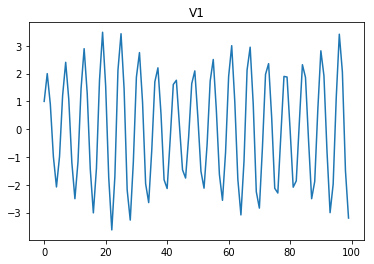

In [8]:
plt.plot(range(T), V1)
plt.title('V1')
plt.show()

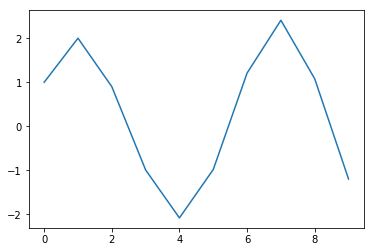

In [9]:
plt.plot(range(10), V1[:10])
plt.show()

In [19]:
V2,Y2 = compute_ressort(T, dt, V_0=1, V_1=2, F=0.2, k=1, Vmin=0.05, Vmax=2, noise=True, sigma=0.2)
V3,Y3 = compute_ressort(T, dt, V_0=1, V_1=2, F=0.2, k=1, Vmin=0.05, Vmax=2, noise=True, sigma=0.2)
V4,Y4 = compute_ressort(T, dt, V_0=1, V_1=2, F=0.2, k=1, Vmin=0.05, Vmax=2, noise=True, sigma=0.2)

[1]
[1]
[0]


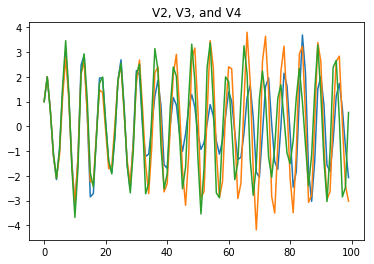

In [21]:
plt.plot(range(T), V2, range(T), V3, range(T), V4)
plt.title('V2, V3, and V4')
plt.show()

In [22]:
desc1 = descriptor(V1)
desc2 = descriptor(V2)
desc1 = np.concatenate((desc1,Y1))
desc2 = np.concatenate((desc2,Y2))
desc3 = descriptor(V3)
desc3 = np.concatenate((desc3,Y3))
desc4 = descriptor(V4)
desc4 = np.concatenate((desc4,Y4))
desc1,desc2

(array([  1.11561035e-02,   1.93825786e+00,   1.00000000e+00,
          1.80783668e+01,  -1.70000000e-01,  -1.35963560e-03,
          0.00000000e+00]),
 array([  3.74056356e-02,   1.55412777e+00,   1.00000000e+00,
          1.41379997e+01,   1.70000000e-01,   1.79224314e-03,
          1.00000000e+00]))

#### Calcule de la distance

In [24]:
distance_EMD([desc1, desc1, desc1], [desc2, desc3, desc4], dist)

([(0, 2), (1, 1), (2, 0)], 2.3479440485842287)

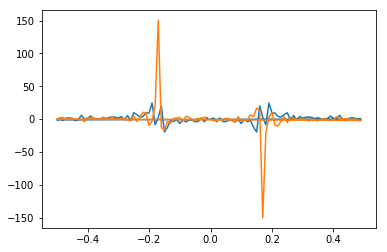

In [12]:
sp = np.fft.fft(V2)
freq = np.fft.fftfreq(T, dt)
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

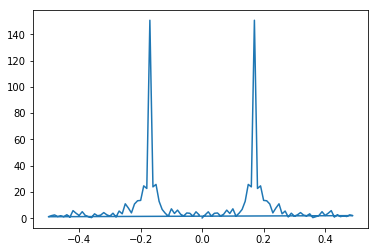

In [13]:
plt.plot(freq, abs(sp))
plt.show()

In [14]:
#def autocorr(x, t=0):
    #np.corrcoef(np.array([x[0:len(x)-t], x[t:len(x)]]))
    #np.corrcoef(x)